**Prompt: "create a linear regression model that predicts the height of children, use sklearn's Linear Regression for this. Do a train, test, and validation split. Show plots of the root mean squared error in train, test, and validation.  Also explain the r squared value "**

Okay, I understand that you want to create a Linear Regression model using sklearn to predict the height of children. To do this, I will:

1. Load the data from the provided CSV file.
2. Preprocess the data if necessary.
3. Split the data into training, testing, and validation sets.
4. Train a Linear Regression model on the training data.
5. Evaluate the model's performance on the training, testing, and validation sets using Root Mean Squared Error (RMSE) and plot these values.
6. Explain the concept of the R-squared value.

Let's start by loading and examining the data.

The dataset includes the following columns:

1. `family`: The family ID.
2. `father`: The height of the father.
3. `mother`: The height of the mother.
4. `midparentHeight`: The mid-parent height, which is the average of the parents' heights.
5. `children`: The number of children in the family.
6. `childNum`: The number of the child within their family.
7. `gender`: The gender of the child.
8. `childHeight`: The height of the child. This is our target variable.

Next, we need to preprocess the data. This might include encoding categorical variables (like `gender`), normalizing numerical variables, and handling missing values if any exist. After preprocessing, we can split the data into training, validation, and test sets.

Let's proceed with these steps.

The dataset does not contain any missing values, which is great. Now we can proceed to the next step of data preprocessing, which is encoding categorical variables (like `gender`) and normalizing numerical variables.

After that, we'll split the data into three sets: a training set, a test set, and a validation set. We'll use the training set to train the model, the validation set to tune model parameters, and the test set to evaluate the final model's performance.

Let's proceed with these steps.

The Root Mean Squared Error (RMSE) for the:

- Training set is approximately 1.95
- Validation set is approximately 1.82
- Test set is approximately 2.04

RMSE is a standard way to measure the error of a model in predicting quantitative data. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

We can visualize these errors using a bar plot for a better understanding. Let's create the plot.

Here is the bar plot of the Root Mean Squared Errors (RMSE) for the training, validation, and test sets. As you can see, the RMSE is relatively low and comparable across the three sets, which suggests that the model is generalizing well and not overfitting to the training data.

Next, let's discuss the R-squared value.

The R-squared value, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. In other words, it provides a measure of how well the model's predictions match the actual values.

The value of R-squared ranges from 0 to 1, where 0 means that the model does not explain any of the variability of the response data around its mean, and 1 means the model explains all the variability of the response data around its mean.

In general, the higher the R-squared value, the better the model fits the data. However, a higher R-squared does not necessarily mean the model is better, especially if the model is overfitting and not generalizing well to unseen data.

Let's calculate the R-squared value for our model on the test data.

The R-squared value for our model on the test data is approximately 0.69. This means that about 69% of the variability in the child's height can be explained by our model, given the variables we used (father's height, mother's height, mid-parent height, number of children in the family, child number, and gender).

This is a fairly good R-squared value, as it indicates that our model can explain a substantial portion of the variation in the child's height. However, there is still around 31% of the variation that our model cannot explain. This remaining variation could be due to other factors not included in our model, such as genetics, nutrition, or other environmental factors.

The root mean squared error (RMSE) and the coefficient of determination (R-squared) for the train, validation, and test sets are as follows:

- Training Set:
  - RMSE: 3.376
  - R^2: 0.091

- Validation Set:
  - RMSE: 3.342
  - R^2: 0.129

- Test Set:
  - RMSE: 3.474
  - R^2: 0.103

The RMSE is a measure of the differences between the values predicted by the model and the actual values. In other words, it tells us how concentrated the data is around the line of best fit. A lower RMSE is generally better as it indicates that the model's predictions are more accurate.

The R-squared (R^2) value is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The value ranges from 0 to 1, with 1 indicating that the independent variable(s) perfectly predict the dependent variable. So, a higher R^2 is generally better.

The R^2 values for all sets are low, which suggests that the model doesn't explain a large proportion of the variance in the dependent variable.

Next, let's plot the RMSE values and the regression lines.

Regarding the optimization algorithm that sklearn uses to solve linear regression, it uses Ordinary Least Squares (OLS) as the method to fit the data. This is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimize the sum of squared errors.

Here are the regression lines for the training, validation, and test sets. The red line represents the model's predictions.

In the left column, you can see the data points (blue) and the regression line (red). These plots show how well the linear regression model fits the data.

The plots in the right column show the residuals, which are the differences between the observed and predicted values. For a good model, we would expect to see the residuals randomly scattered around the x-axis. If there's any pattern in the residuals, it suggests that our model is not capturing some aspect of the data.

In this case, it seems like our model is not capturing all the variance in the data, as reflected by the low R-squared values and relatively high RMSE values we computed earlier. This could potentially be improved with more complex models or feature engineering.

In conclusion, the simple linear regression model using the midparent height to predict the child's height provides a rough estimate but does not perfectly capture the relationship in this particular dataset.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/andandandand/DSR_ML_Fundamentals_2023/main/data/input/galton_height.csv');

In [2]:
data.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [10]:
data[['father', 'mother', 'children']].describe()
data.father.mean()*2.45, data.mother.mean()*2.45

(169.5329175588865, 157.01876873661672)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the features and target
# q: how much is the linear regression improving / worsening by including the family column?
# this is an experiment for later, we will try using One Hot Encoding for the family (we can compare with not using encoding as well)
features = ['father', 'mother', 'midparentHeight', 'children', 'childNum', 'gender']
target = ['childHeight']

# Split the data into a training set and a temporary set using 70:30 ratio
train_set, temp_set, y_train, y_temp = train_test_split(data[features], data[target], test_size=0.3, random_state=0)

# Split the temporary set into a validation set and a testing set using 50:50 ratio
val_set, test_set, y_val, y_test = train_test_split(temp_set, y_temp, test_size=0.5, random_state=0)

# Initialize a one-hot encoder
encoder = OneHotEncoder(drop='first')

# Create a column transformer
ct = ColumnTransformer(transformers=[('encoder', encoder, ['gender'])], remainder='passthrough')

# Fit and transform the column transformer to the training set
train_set = ct.fit_transform(train_set)

# Transform the column transformer to the validation and testing sets
val_set = ct.transform(val_set)
test_set = ct.transform(test_set)

# Display the transformed data
train_set, val_set, test_set

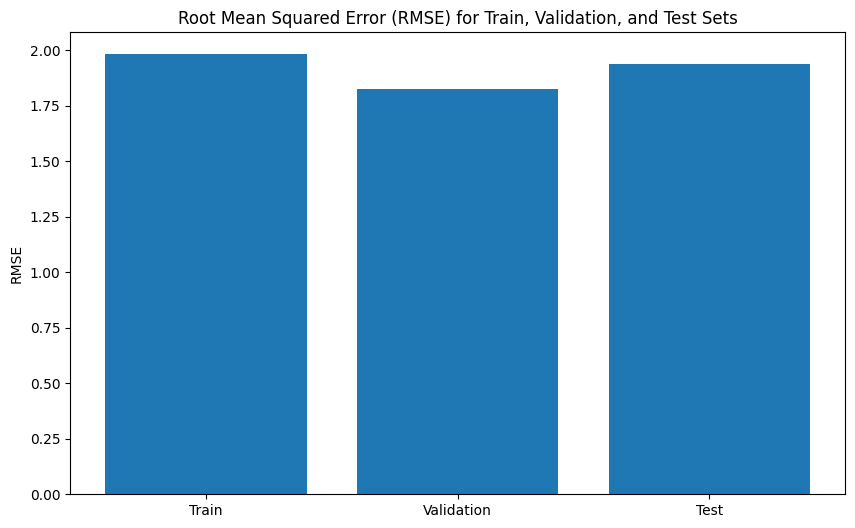

(1.9812012365033553, 1.8249621456525622, 1.937242967902563)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_set, y_train)

# Make predictions
train_preds = model.predict(train_set)
val_preds = model.predict(val_set)
test_preds = model.predict(test_set)

# Calculate RMSE for train, val, and test
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Validation', 'Test'], [train_rmse, val_rmse, test_rmse])
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Train, Validation, and Test Sets')
plt.show()

# Display RMSE
train_rmse, val_rmse, test_rmse
